In [1]:
from scipy import *
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

d=128
a=rand(d,d) # make a random map
theta = 2.0 # pixels

######## Fourier space filter
F = fftshift(fftpack.fft2(a))
y, x = np.indices(a.shape)
center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])
center+=0.5
k = np.hypot(x - center[0], y - center[1])/d ## Fourier frequencies
WR = exp(-(2*pi*k*theta)**2/2.0) ## Gaussian filter
F_filtered = F*WR ## Filter the map
a_filtered = real(ifft2(ifftshift(F_filtered)))

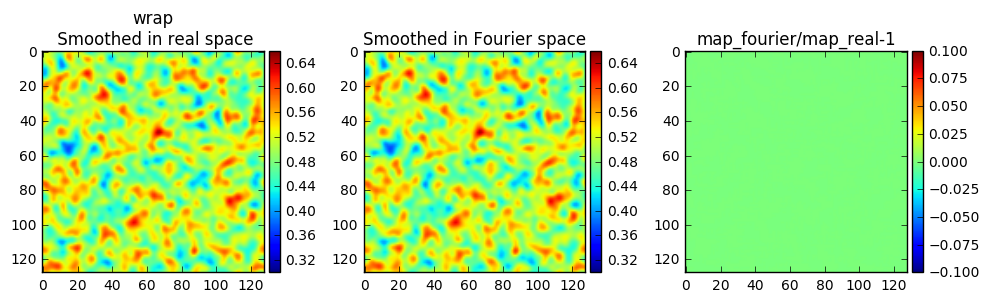

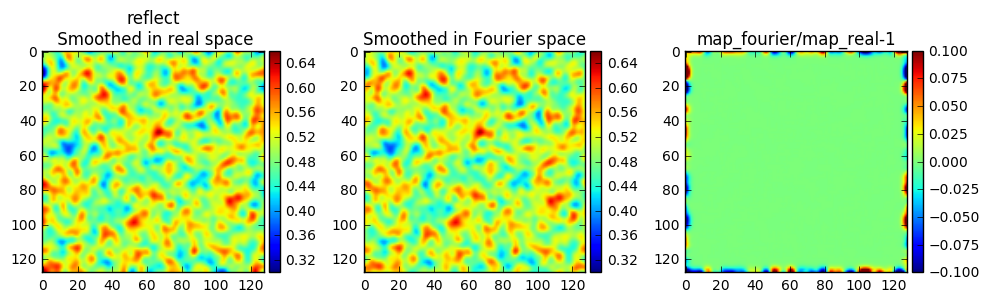

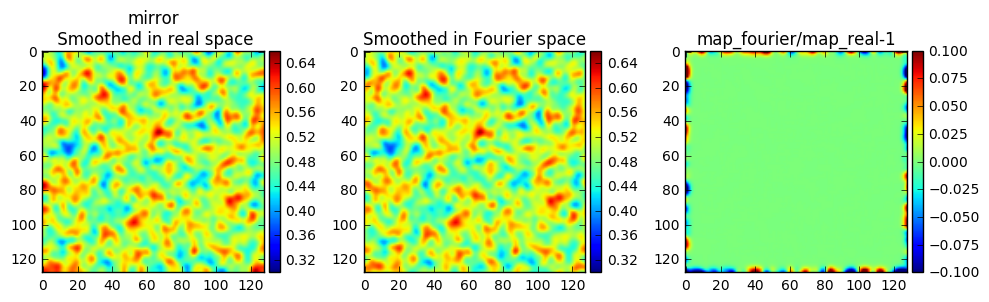

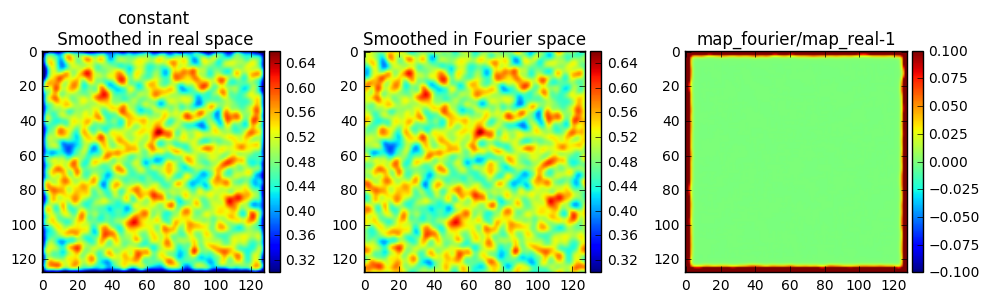

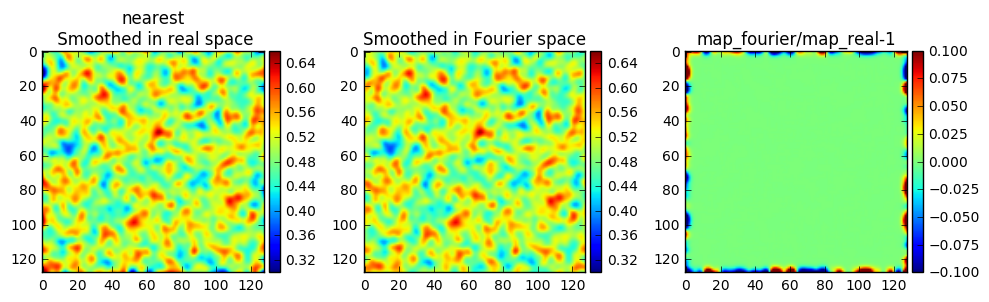

In [2]:

for imode in ('wrap','reflect','mirror','constant','nearest'):
    ######## real space filter
    a_smooth = gaussian_filter(a, theta,mode=imode)

    ####### plotting
    f,(ax1,ax2,ax3)=subplots(1,3,figsize=(10,4))
    cb1=ax1.imshow(a_smooth,vmin=0.3,vmax=0.66)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    colorbar(cb1, cax=cax, orientation='vertical')

    cb2=ax2.imshow(a_filtered,vmin=0.3,vmax=0.66)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    colorbar(cb2, cax=cax, orientation='vertical')


    cb3=ax3.imshow(a_filtered/a_smooth-1,vmin=-0.1, vmax=0.1)
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    colorbar(cb3, cax=cax, orientation='vertical')

    ax1.set_title('%s\n Smoothed in real space'%(imode))
    ax2.set_title('Smoothed in Fourier space')
    ax3.set_title('map_fourier/map_real-1')
    plt.tight_layout()
    show()